In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from twarc import Twarc
import sqlite3
import os
import glob

## Data Collection for Covid-Related Policies and Restrictions
Import CSV into dataframes

In [284]:
testing_policy = pd.read_csv("raw_data/covid-19-testing-policy.csv")
contact_tracing = pd.read_csv("raw_data/covid-contact-tracing.csv")
contaiment_health_index = pd.read_csv("raw_data/covid-containment-and-health-index.csv")
vacc_policy = pd.read_csv("raw_data/covid-vaccination-policy.csv")
debt_relief = pd.read_csv("raw_data/debt-relief-covid.csv")
face_covering = pd.read_csv("raw_data/face-covering-policies-covid.csv")
income_support = pd.read_csv("raw_data/income-support-covid.csv")
internal_movement = pd.read_csv("raw_data/internal-movement-covid.csv")
international_travel = pd.read_csv("raw_data/international-travel-covid.csv")
public_campaigns = pd.read_csv("raw_data/public-campaigns-covid.csv")
public_events = pd.read_csv("raw_data/public-events-covid.csv")
public_gathering = pd.read_csv("raw_data/public-gathering-rules-covid.csv")
public_transport = pd.read_csv("raw_data/public-transport-covid.csv")
school_closures = pd.read_csv("raw_data/school-closures-covid.csv")
stay_at_home = pd.read_csv("raw_data/stay-at-home-covid.csv")
workplace_closures = pd.read_csv("raw_data/workplace-closures-covid.csv")
covid_data = pd.read_csv("raw_data/owid-covid-data.csv")

Sentiment Score CSV

### Simple version: International Travel && Testing Policy, US && China
Date Range: 2020-03-01 to 2022-03-01 (announced pandemic by WHO on 3/11)

#### Cleaning Dataframe for China

In [285]:
China_df = international_travel[international_travel["Code"] == "CHN"]
China_df = China_df.drop(["Code"],axis=1)
China_df = China_df.rename({"Entity":"Country"},axis=1)
China_df["Day"]= pd.to_datetime(China_df["Day"])
China_df = China_df.loc[(China_df['Day'] >= '2020-03-20') & (China_df['Day'] <= '2022-09-20')]

In [287]:
#China_df.set_index("Day")
China_df

,Country,Day,international_travel_controls
35851,China,2021-08-02,2
35852,China,2021-08-03,2
35853,China,2021-08-04,2
35854,China,2021-08-05,2
35855,China,2021-08-06,2
...,...,...,...
35946,China,2021-11-05,2
35947,China,2021-11-06,2
35948,China,2021-11-07,2
35949,China,2021-11-08,2


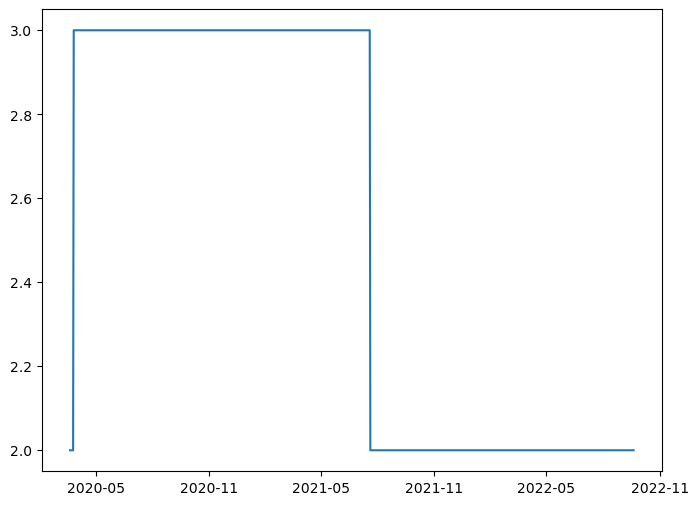

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(China_df.Day, China_df.international_travel_controls);

#### Cleaning Dataframe for USA

In [288]:
US_df = international_travel[international_travel["Code"] == "USA"]
US_df = US_df.drop(["Code"],axis=1)
US_df = US_df.rename({"Entity":"Country"},axis=1)
US_df["Day"]= pd.to_datetime(US_df["Day"])
US_df = US_df.loc[(US_df['Day'] >= '2020-03-20') & (US_df['Day'] <= '2022-09-20')]

In [299]:
# US_df.set_index("Day")
US_df[590:650]

,Country,Day,international_travel_controls
177540,United States,2021-10-31,3
177541,United States,2021-11-01,3
177542,United States,2021-11-02,3
177543,United States,2021-11-03,3
177544,United States,2021-11-04,3
177545,United States,2021-11-05,3
177546,United States,2021-11-06,3
177547,United States,2021-11-07,3
177548,United States,2021-11-08,1
177549,United States,2021-11-09,1


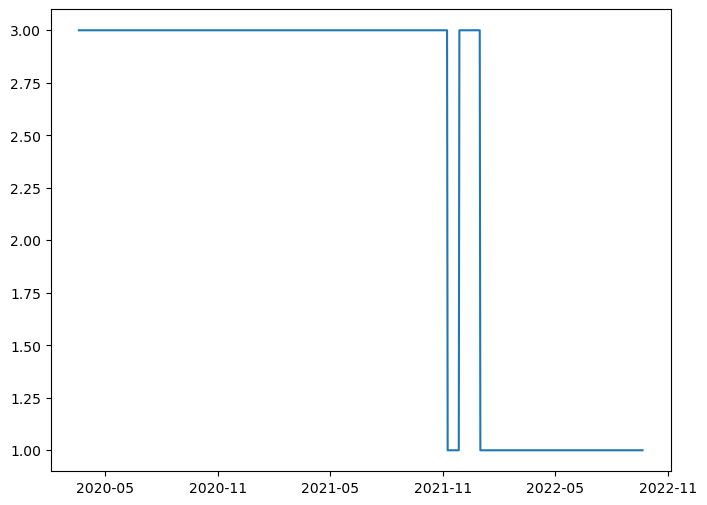

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(US_df.Day, US_df.international_travel_controls);

# Data Collection for Sentiment Score

In [9]:
covid_1 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_01.txt",sep=" ")
covid_2 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_02.txt",sep=" ")
covid_3 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_03.txt",sep=" ")
covid_4 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_04.txt",sep=" ")
covid_5 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_05.txt",sep=" ")
covid_6 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_06.txt",sep=" ")
covid_7 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_07.txt",sep=" ")
covid_8 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_08.txt",sep=" ")
covid_9 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_09.txt",sep=" ")
covid_10 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_10.txt",sep=" ")
covid_11 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_11.txt",sep=" ")
covid_12 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_12.txt",sep=" ")
covid_13 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_13.txt",sep=" ")
covid_14 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_14.txt",sep=" ")
covid_15 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_15.txt",sep=" ")
covid_15 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_16.txt",sep=" ")
covid_17 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_17.txt",sep=" ")
covid_18 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_18.txt",sep=" ")
covid_19 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_19.txt",sep=" ")
covid_20 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_20.txt",sep=" ")
covid_21 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_21.txt",sep=" ")
covid_22 = pd.read_csv("raw_covid_data/MegaGeoCOV_part_22.txt",sep=" ")

# Data Collection of Twitter ID and sentiment score
Combine the csv files from each year together

In [206]:
file_path = '/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/2021'

In [207]:
file_list = os.listdir(file_path)

In [22]:
"""This combines all the csv files in a folder together into a dataframe"""
#change directory to 2020 (cd 2020)
csv_files_2020 = glob.glob('*.{}'.format('csv'))
df_2020 = pd.concat([pd.read_csv(f,header=None) for f in csv_files_2020 ], ignore_index=True)

In [211]:
#change directory to 2021 (cd 2021)
csv_files_2021 = glob.glob('*.{}'.format('csv'))
df_2021 = pd.concat([pd.read_csv(f,header=None) for f in csv_files_2021 ], ignore_index=True)

In [28]:
#change directory to 2021 (cd 2021)
csv_files_2022 = glob.glob('*.{}'.format('csv'))
df_2022 = pd.concat([pd.read_csv(f,header=None) for f in csv_files_2022 ], ignore_index=True)

In [29]:
#df_2020.to_csv("concat_2020.csv")

In [212]:
df_2021.to_csv("concat_2021.csv")

In [31]:
#df_2022.to_csv("concat_2022.csv")

## Export tweet id for hydration
Remove Sentiment Score

In [213]:
df_2020 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/concat_2020.csv")
df_2021 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/concat_2021.csv")
df_2022 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/concat_2022.csv")

In [214]:
df_2020 = df_2020.drop(columns=["Unnamed: 0"])
df_2021 = df_2021.drop(columns=["Unnamed: 0"])
df_2022 = df_2022.drop(columns=["Unnamed: 0"])

In [220]:
"""Extract first column of dataframe for the Twitter ID, that can be used in the hydrator"""
#df_2020_id = df_2020[0]
#df_2020_id.to_csv("df_2020_id.csv", index=False, header=None)

df_2021_id = df_2021["0"]
df_2021_id.to_csv("df_2021_id.csv", index=False, header=None)

#df_2022_id = df_2022[0]
#df_2022_id.to_csv("df_2022_id.csv", index=False, header=None)

In [222]:
"""A hydrator was used to extract the content of the tweets"""
hydrated_2020 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/df_2020_hydrate.csv")
hydrated_2021 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/df_2021_hydrate.csv")
hydrated_2022 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/df_2022_hydrate.csv")

In [28]:
list(hydrated_2020)

['coordinates',
 'created_at',
 'hashtags',
 'media',
 'urls',
 'favorite_count',
 'id',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_id',
 'retweet_count',
 'retweet_id',
 'retweet_screen_name',
 'source',
 'text',
 'tweet_url',
 'user_created_at',
 'user_id',
 'user_default_profile_image',
 'user_description',
 'user_favourites_count',
 'user_followers_count',
 'user_friends_count',
 'user_listed_count',
 'user_location',
 'user_name',
 'user_screen_name',
 'user_statuses_count',
 'user_time_zone',
 'user_urls',
 'user_verified']

### Extract "id", "created_at", and "place" and merge with sentiment score

In [263]:
"""Create new dataframe with the Twitter ID, location, and date of the tweets"""
tweet_2020 = pd.DataFrame(hydrated_2020, columns = ["id","created_at","place"])
tweet_2021 = pd.DataFrame(hydrated_2021, columns = ["id","created_at","place"])
tweet_2022 = pd.DataFrame(hydrated_2022, columns = ["id","created_at","place"])

In [264]:
df_2020.columns = ["id","sentiment score"]
df_2021.columns = ["id","sentiment score"]
df_2022.columns = ["id","sentiment score"]

In [265]:
"""Merge dataframes from hydration and sentiment score together, on ID"""
final_df_2020 = pd.merge(tweet_2020, df_2020, on='id')
final_df_2021 = pd.merge(tweet_2021, df_2021, on='id')
final_df_2022 = pd.merge(tweet_2022, df_2022, on='id')

In [226]:
final_df_2020.to_csv("final_df_2020.csv")
final_df_2021.to_csv("final_df_2021.csv")
final_df_2022.to_csv("final_df_2022.csv")

### Extract country names from the location given
(Use same code from CS234 Final Project)

/Users/jennychan/Desktop/Data Science Capstone


In [171]:
final_df_2020 = pd.read_csv("final_df_2020.csv")
final_df_2021 = pd.read_csv("final_df_2021.csv")
final_df_2022 = pd.read_csv("final_df_2022.csv")

In [172]:
final_df_2020 = final_df_2020.drop(columns=["Unnamed: 0"])
final_df_2021 = final_df_2021.drop(columns=["Unnamed: 0"])
final_df_2022 = final_df_2022.drop(columns=["Unnamed: 0"])

In [266]:
final_df_2020["Country"] = final_df_2020["place"]
final_df_2021["Country"] = final_df_2021["place"]
final_df_2022["Country"] = final_df_2022["place"]

In [267]:
"""Add column year to indicate the year of the tweet """
final_df_2020["year"] = "2020"
final_df_2021["year"] = "2021"
final_df_2022["year"] = "2022"

In [268]:
final = pd.concat([final_df_2020,final_df_2021,final_df_2022])

In [269]:
"""Keep track of whether the country has been extracted or not"""
final["changed"] = ""
final

,id,created_at,place,sentiment score,Country,year,changed
0,1247081204698005506,Mon Apr 06 08:38:23 +0000 2020,"Melbourne, Victoria",0.125935,"Melbourne, Victoria",2020,
1,1247045759108886528,Mon Apr 06 06:17:32 +0000 2020,"Jaipur, India",-0.350000,"Jaipur, India",2020,
2,1247052764317876224,Mon Apr 06 06:45:22 +0000 2020,"Dutse, Nigeria",-0.077778,"Dutse, Nigeria",2020,
3,1247080846949040129,Mon Apr 06 08:36:58 +0000 2020,"Manhattan, NY",0.000000,"Manhattan, NY",2020,
4,1247101846050742272,Mon Apr 06 10:00:24 +0000 2020,"Suleja, Nigeria",0.250000,"Suleja, Nigeria",2020,
...,...,...,...,...,...,...,...
26551,1535744703546662913,Sat Jun 11 22:04:04 +0000 2022,"Texas, USA",0.000000,"Texas, USA",2022,
26552,1535642774166544384,Sat Jun 11 15:19:02 +0000 2022,"Mbeya, Tanzania",0.053333,"Mbeya, Tanzania",2022,
26553,1535783766982963201,Sun Jun 12 00:39:18 +0000 2022,"Torrance, CA",0.437500,"Torrance, CA",2022,
26554,1535704764197089281,Sat Jun 11 19:25:22 +0000 2022,"East Providence, RI",0.011111,"East Providence, RI",2022,


In [270]:
"""Check if it's empty, replace NaN value to None"""
final["Country"] = np.where(pd.isnull(final["place"]) == True,"None",final["Country"])
final["place"] = np.where(pd.isnull(final["place"]) == True,"None",final["place"])

In [271]:
final[final["Country"]== "None"]

,id,created_at,place,sentiment score,Country,year,changed
63,1247109120877944837,Mon Apr 06 10:29:19 +0000 2020,None,0.000000,None,2020,
289,1247267263184613382,Mon Apr 06 20:57:43 +0000 2020,None,-0.300000,None,2020,
414,1322774236306444288,Sun Nov 01 05:35:28 +0000 2020,None,0.800000,None,2020,
565,1322890187660288002,Sun Nov 01 13:16:13 +0000 2020,None,0.000000,None,2020,
861,1322989463992213504,Sun Nov 01 19:50:42 +0000 2020,None,0.000000,None,2020,
...,...,...,...,...,...,...,...
24559,1479932934559875079,Sat Jan 08 21:48:02 +0000 2022,None,0.266667,None,2022,
24939,1532407309229498368,Thu Jun 02 17:02:27 +0000 2022,None,0.000000,None,2022,
25865,1491300289965662211,Wed Feb 09 06:37:50 +0000 2022,None,0.000000,None,2022,
26264,1503011857145241600,Sun Mar 13 14:15:26 +0000 2022,None,0.000000,None,2022,


In [272]:
final.to_csv("final_before_country.csv")

## Check if place contains a state abbreviation
If the location contains a state abbreviation, or "USA", change country value to "United States"

In [273]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [274]:
states = '|'.join(states)

In [275]:
"""If the place contains a state abbreviation, place value 1 in changed column and United States in country column"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(states) == True ,"United States", final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(states) == True ,1, final["changed"])

In [276]:
"""If the place name contains USA, change Country value to United States"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("USA"),"United States",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("USA"),1,final["changed"])

In [277]:
len(final[final["Country"] == "United States"]) ##changed 43% to United States

178050

In [278]:
len(final)

412784

In [279]:
US_final = final[final["Country"] == "United States"]

In [282]:
US_final[US_final["sentiment score"] <0]

,id,created_at,place,sentiment score,Country,year,changed
52,1247042107895939077,Mon Apr 06 06:03:02 +0000 2020,"Bellevue, WA",-0.375000,United States,2020,1
55,1247073168113700864,Mon Apr 06 08:06:27 +0000 2020,"Greenlawn, NY",-0.031818,United States,2020,1
135,1247179695017394176,Mon Apr 06 15:09:45 +0000 2020,"Long Beach, CA",-0.122656,United States,2020,1
142,1247147211919691777,Mon Apr 06 13:00:40 +0000 2020,"Georgia, USA",-0.187500,United States,2020,1
167,1247185521530540034,Mon Apr 06 15:32:54 +0000 2020,"Crofton, MD",-0.155556,United States,2020,1
...,...,...,...,...,...,...,...
26500,1535460747832184833,Sat Jun 11 03:15:44 +0000 2022,"Corona, CA",-0.125000,United States,2022,1
26520,1535692015731613698,Sat Jun 11 18:34:42 +0000 2022,"Boston, MA",-0.390625,United States,2022,1
26532,1535579075397435397,Sat Jun 11 11:05:55 +0000 2022,"Westerville, OH",-0.400000,United States,2022,1
26533,1535757028588519429,Sat Jun 11 22:53:03 +0000 2022,"Wethersfield, CT",-0.500000,United States,2022,1


In [280]:
US_final.to_csv("US_final.csv")

## Check if place is in the UK
If the location contains "England", "London" or "United Kingdom", change country value to "United Kingom"

In [246]:
"""If the place name contains England, change Country value to United Kingdom"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("England"),"United Kingdom",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("England"),1,final["changed"])



In [247]:
"""If the place name contains London, change Country value to United Kingdom"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("London"),"United Kingdom",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("London"),1,final["changed"])


In [248]:
"""If the place name contains United Kingdom, change Country value to United Kingdom"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("United Kingdom"),"United Kingdom",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("United Kingdom"),1,final["changed"])


In [249]:
len(final[final["Country"] == "United Kingdom"]) #changed 51852, 13% to United Kingdom

52201

## Check if place is in India
If the location contains "India", change country value to "India"

In [250]:
"""If the place name contains India, change Country value to India"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("India"),"India",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("India"),1,final["changed"])


In [251]:
len(final[final["Country"] == "India"]) ##changed 25194, 6% to India

25302

In [252]:
final[final["Country"] == "India"]

,id,created_at,place,sentiment score,Country,year,changed
1,1247045759108886528,Mon Apr 06 06:17:32 +0000 2020,"Jaipur, India",-0.350000,India,2020,1
9,1247077851607830528,Mon Apr 06 08:25:04 +0000 2020,"Aligarh, India",0.471429,India,2020,1
11,1247052656687931393,Mon Apr 06 06:44:57 +0000 2020,"New Delhi, India",0.000000,India,2020,1
12,1247041003841654784,Mon Apr 06 05:58:38 +0000 2020,"Jaipur, India",0.000000,India,2020,1
13,1247066136396607489,Mon Apr 06 07:38:30 +0000 2020,"New Delhi, India",0.000000,India,2020,1
...,...,...,...,...,...,...,...
26375,1485479646506405888,Mon Jan 24 05:08:41 +0000 2022,"Surat, India",0.000000,India,2022,1
26410,1485663576245342212,Mon Jan 24 17:19:33 +0000 2022,"Sholinganallur, India",-0.125000,India,2022,1
26451,1566710291177545731,Mon Sep 05 08:50:16 +0000 2022,"Patiala, India",0.227273,India,2022,1
26469,1535519854500843520,Sat Jun 11 07:10:36 +0000 2022,"Saidapet, India",0.000000,India,2022,1


## Check if place is in Canada
If the location contains one of the canadian provinces, change country value to "Canada"

In [253]:
canadian_provinces = ['Alberta','British Columbia','Manitoba','New Brunswick',
                      'Newfoundland and Labrador','Northwest Territories','Nova Scotia',
                      'Nunavut','Ontario','Prince Edward Island','Québec','Saskatchewan','Yukon']
final_canada = '|'.join(canadian_provinces)

In [254]:
final_canada

'Alberta|British Columbia|Manitoba|New Brunswick|Newfoundland and Labrador|Northwest Territories|Nova Scotia|Nunavut|Ontario|Prince Edward Island|Québec|Saskatchewan|Yukon'

In [255]:
"""If the place name contains a Canadian province, change Country value to Canada"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(final_canada),"Canada",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(final_canada),1,final["changed"])


In [256]:
len(final[final["Country"] == "Canada"]) ##changed 43539, 10.6% to Canada

43950

In [257]:
final[final["Country"] == "Canada"]

,id,created_at,place,sentiment score,Country,year,changed
72,1247144990461001728,Mon Apr 06 12:51:51 +0000 2020,"Toronto, Ontario",0.000000,Canada,2020,1
145,1247120414540627968,Mon Apr 06 11:14:11 +0000 2020,"Toronto, Ontario",0.300000,Canada,2020,1
186,1247199368257703937,Mon Apr 06 16:27:55 +0000 2020,"Toronto, Ontario",0.380739,Canada,2020,1
203,1247219027207806976,Mon Apr 06 17:46:02 +0000 2020,"Montréal, Québec",0.250000,Canada,2020,1
204,1247213615477710848,Mon Apr 06 17:24:32 +0000 2020,"Brampton, Ontario",-0.065909,Canada,2020,1
...,...,...,...,...,...,...,...
26537,1535739916465733632,Sat Jun 11 21:45:03 +0000 2022,"Ottawa, Ontario",0.000000,Canada,2022,1
26538,1535636111824809984,Sat Jun 11 14:52:34 +0000 2022,"Ottawa, Ontario",0.000000,Canada,2022,1
26539,1535741365107269633,Sat Jun 11 21:50:48 +0000 2022,"Halifax, Nova Scotia",0.437500,Canada,2022,1
26543,1535581642495954944,Sat Jun 11 11:16:07 +0000 2022,"Ottawa, Ontario",0.075000,Canada,2022,1


## Check if place is in Brazil
If the location contains "Brasil" or "Brazil", change country value to "Brazil"

In [258]:
"""If the place name contains Brasil or Brazil, change Country value to Brazil"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("Brazil"),"Brazil",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("Brazil"),1,final["changed"])

final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("Brasil"),"Brazil",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("Brasil"),1,final["changed"])


In [259]:
len(final[final["Country"] == "Brazil"]) #837

847

In [260]:
final[final["changed"]==1]

,id,created_at,place,sentiment score,Country,year,changed
1,1247045759108886528,Mon Apr 06 06:17:32 +0000 2020,"Jaipur, India",-0.350000,India,2020,1
3,1247080846949040129,Mon Apr 06 08:36:58 +0000 2020,"Manhattan, NY",0.000000,United States,2020,1
7,1247080846550609922,Mon Apr 06 08:36:58 +0000 2020,"Manhattan, NY",0.000000,United States,2020,1
9,1247077851607830528,Mon Apr 06 08:25:04 +0000 2020,"Aligarh, India",0.471429,India,2020,1
11,1247052656687931393,Mon Apr 06 06:44:57 +0000 2020,"New Delhi, India",0.000000,India,2020,1
...,...,...,...,...,...,...,...
26550,1535628612799709186,Sat Jun 11 14:22:46 +0000 2022,"Hamilton, Ontario",0.380682,Canada,2022,1
26551,1535744703546662913,Sat Jun 11 22:04:04 +0000 2022,"Texas, USA",0.000000,United States,2022,1
26553,1535783766982963201,Sun Jun 12 00:39:18 +0000 2022,"Torrance, CA",0.437500,United States,2022,1
26554,1535704764197089281,Sat Jun 11 19:25:22 +0000 2022,"East Providence, RI",0.011111,United States,2022,1


In [261]:
len(final[final["Country"] == "Brazil"]) ##changed 11649, 3% to Canada

847

In [204]:
final["first"] = 

SyntaxError: invalid syntax (3217316121.py, line 1)

In [ ]:
 final.place.str.split(",",expand=True)

In [103]:
 final["second"] = pd.Series(data = final.place.str.split(",",expand=True)[1])

In [104]:
final["Country"] = np.where(final["second"].str.contains(countries),final["second"],final["Country"])
final["changed"] = np.where(final["second"].str.contains(countries),1,final["changed"])

NameError: name 'countries' is not defined

In [105]:
final[final["changed"]==1]

,id,created_at,place,sentiment score,Country,year,changed,second
1,1247045759108886528,Mon Apr 06 06:17:32 +0000 2020,"Jaipur, India",-0.350000,India,2020,1,India
3,1247080846949040129,Mon Apr 06 08:36:58 +0000 2020,"Manhattan, NY",0.000000,United States,2020,1,NY
7,1247080846550609922,Mon Apr 06 08:36:58 +0000 2020,"Manhattan, NY",0.000000,United States,2020,1,NY
9,1247077851607830528,Mon Apr 06 08:25:04 +0000 2020,"Aligarh, India",0.471429,India,2020,1,India
11,1247052656687931393,Mon Apr 06 06:44:57 +0000 2020,"New Delhi, India",0.000000,India,2020,1,India
...,...,...,...,...,...,...,...,...
26550,1535628612799709186,Sat Jun 11 14:22:46 +0000 2022,"Hamilton, Ontario",0.380682,Canada,2022,1,Ontario
26551,1535744703546662913,Sat Jun 11 22:04:04 +0000 2022,"Texas, USA",0.000000,United States,2022,1,USA
26553,1535783766982963201,Sun Jun 12 00:39:18 +0000 2022,"Torrance, CA",0.437500,United States,2022,1,CA
26554,1535704764197089281,Sat Jun 11 19:25:22 +0000 2022,"East Providence, RI",0.011111,United States,2022,1,RI


In [557]:
final[final["changed"]!=1][50:100]

,id,created_at,place,sentiment score,Country,year,changed,second
416,1322779906250477570,Sun Nov 01 05:58:00 +0000 2020,Nepal,-0.035714,Nepal,2020,,None
418,1322781132367253504,Sun Nov 01 06:02:52 +0000 2020,"Grandchester, Queensland",0.316667,"Grandchester, Queensland",2020,,Queensland
424,1247381134926888960,Tue Apr 07 04:30:12 +0000 2020,"İstanbul, Türkiye",0.300000,"İstanbul, Türkiye",2020,,Türkiye
428,1247394134308118533,Tue Apr 07 05:21:51 +0000 2020,"Chuo-ku, Tokyo",0.142857,"Chuo-ku, Tokyo",2020,,Tokyo
429,1247406307474313216,Tue Apr 07 06:10:14 +0000 2020,"Gangnam-gu, Republic of Korea",-0.125000,"Gangnam-gu, Republic of Korea",2020,,Republic of Korea
435,1322779267281887237,Sun Nov 01 05:55:28 +0000 2020,"Quezon City, National Capital Region",0.000000,"Quezon City, National Capital Region",2020,,National Capital Region
444,1247379190309105664,Tue Apr 07 04:22:28 +0000 2020,"Pirinççi, İstanbul",0.300000,"Pirinççi, İstanbul",2020,,İstanbul
449,1247385050901024768,Tue Apr 07 04:45:46 +0000 2020,Israel,0.000000,Israel,2020,,None
461,1247377768360423425,Tue Apr 07 04:16:49 +0000 2020,Sri Lanka,0.000000,Sri Lanka,2020,,None
464,1322830876682735621,Sun Nov 01 09:20:32 +0000 2020,"Melbourne, Victoria",0.400000,"Melbourne, Victoria",2020,,Victoria


In [555]:
final.to_csv("final_1.csv")

In [510]:
"""Contains a list of 248 countries in the world"""
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
countries = '|'.join(countries)

/var/folders/cb/cslgs9ts54s2pfw_2qbgwwg80000gn/T/ipykernel_78252/4061326770.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  split["Country"] = np.where(split[1].str.contains(countries),split[1],split["Country"])


In [522]:
split[:50]

,0,1,2,3,Country
0,Melbourne,Victoria,None,None,None
1,Jaipur,India,None,None,India
2,Dutse,Nigeria,None,None,Nigeria
3,Manhattan,NY,None,None,None
4,Suleja,Nigeria,None,None,Nigeria
5,Gimcheon-si,Republic of Korea,None,None,None
6,Cambodia,None,None,None,None
7,Manhattan,NY,None,None,None
8,Lillehammer,Norway,None,None,Norway
9,Aligarh,India,None,None,India


In [191]:
split[2] = np.where(split[1].str.contains(countries),split[1],None)
split[3] = np.where(split[1].str.contains(countries),1,0)

/var/folders/cb/cslgs9ts54s2pfw_2qbgwwg80000gn/T/ipykernel_78252/1592859598.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  split[2] = np.where(split[1].str.contains(countries),split[1],None)
/var/folders/cb/cslgs9ts54s2pfw_2qbgwwg80000gn/T/ipykernel_78252/1592859598.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  split[3] = np.where(split[1].str.contains(countries),1,0)


In [168]:
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[1].str.contains(countries),final["place"].str.split(",",expand = False).str[1],final["Country"])


/var/folders/cb/cslgs9ts54s2pfw_2qbgwwg80000gn/T/ipykernel_78252/302018484.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  final["Country"] = np.where(final["place"].str.split(",",expand = False).str[1].str.contains(countries),final["place"].str.split(",",expand = False).str[1],final["Country"])


In [6]:
from geopy.geocoders import Nominatim

In [10]:
"""
This function uses the library geopy.
It takes in a city/state/location mentioned and returns the country of the location

"""
def country_from_city(place):
    
    try:
        geolocator = Nominatim(user_agent = "geoapiExercises") #initiate the geolocator that looks for the country using the 'geoapi'
        location = geolocator.geocode(place, language="en") #language is english, or else it returns country names in their local language
        full_address = location.address #gives the full address of the place (including city, states, provinces etc)
        final_country = full_address.split(",")[-1].strip() #only want the last part, which is the country
        return final_country
    
    except AttributeError:
        pass
    
    except:
        pass

In [31]:
final_df_2020[5000:10001]

,id,created_at,place,sentiment score,Country
5000,1333730825330855945,Tue Dec 01 11:13:02 +0000 2020,"London, England",0.000000,United Kingdom
5001,1333735573148864512,Tue Dec 01 11:31:54 +0000 2020,"Pleasantville, NY",0.136364,"Pleasantville, NY"
5002,1333715214169223168,Tue Dec 01 10:11:00 +0000 2020,"Kerry, Ireland",-0.166667,"Kerry, Ireland"
5003,1333733463715876865,Tue Dec 01 11:23:31 +0000 2020,"Rochdale, England",0.104167,"Rochdale, England"
5004,1333737987478261764,Tue Dec 01 11:41:30 +0000 2020,"Dublin City, Ireland",0.000000,"Dublin City, Ireland"
...,...,...,...,...,...
9996,1267092030049697796,Sun May 31 13:54:16 +0000 2020,"The Hague, The Netherlands",-0.025000,"The Hague, The Netherlands"
9997,1267109453473734658,Sun May 31 15:03:30 +0000 2020,"Corona, CA",0.000000,"Corona, CA"
9998,1267108262970822656,Sun May 31 14:58:46 +0000 2020,"Ruhpolding, Germany",0.083333,"Ruhpolding, Germany"
9999,1267101396551131138,Sun May 31 14:31:29 +0000 2020,"New Delhi, India",0.500000,"New Delhi, India"


In [15]:
final_df_2020.loc[:500,"Country"] = final_df_2020.loc[:500,"Country"].apply(country_from_city)

In [36]:
final_df_2020.to_csv("final_df_2020.csv")

In [32]:
from datetime import datetime
start_time = datetime.now()
final_df_2020.loc[5001:40000,"Country"] = final_df_2020.loc[5001:40000,"Country"].apply(country_from_city)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 5:20:06.709661


In [35]:
final_df_2020[40000:40002]

,id,created_at,place,sentiment score,Country
40000,1295512276720656386,Tue Aug 18 00:06:10 +0000 2020,"Miami Beach, FL",0.0,United States
40001,1295514004979212290,Tue Aug 18 00:13:02 +0000 2020,"West Molesey, South East",0.0,"West Molesey, South East"


In [ ]:
final_df_2020.loc[500:,"Country"] = final_df_2020.loc[500:,"Country"].apply(country_from_city)

In [ ]:
final_df_2020["Country"].apply(country_from_city)

In [ ]:
final_df_2020.to_csv("final_df_with_countries.csv")